In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=12)
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.facecolor"] = 'white'
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 10
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)
plt.rcParams["errorbar.capsize"] = 6

exp=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/experiment/2020722_nisio2_1b_co2_adsorption_flow_tpd.txt', sep = "\t", header=0)
vanilla=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/tpd_no_cov_no_diff_raffaele.txt', sep = ",", header=0)
no_cov_diff=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/tpd_no_cov_diff_raffaele.txt', sep = ",", header=0)
cov_no_diff=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/tpd_cov_no_diff_raffaele.txt', sep = ",", header=0)
cov_diff=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/tpd_cov_diff_raffaele.txt', sep = ",", header=0)

exp. CO2 436.0
exp. CO2 680.0
vanilla CO2 450.0
vanilla CO 617.0
no_cov_diff CO2 453.0
no_cov_diff CO 617.0
cov_no_diff CO2 449.0
cov_no_diff CO 628.0
cov_diff CO2 424.0
cov_diff CO 629.0


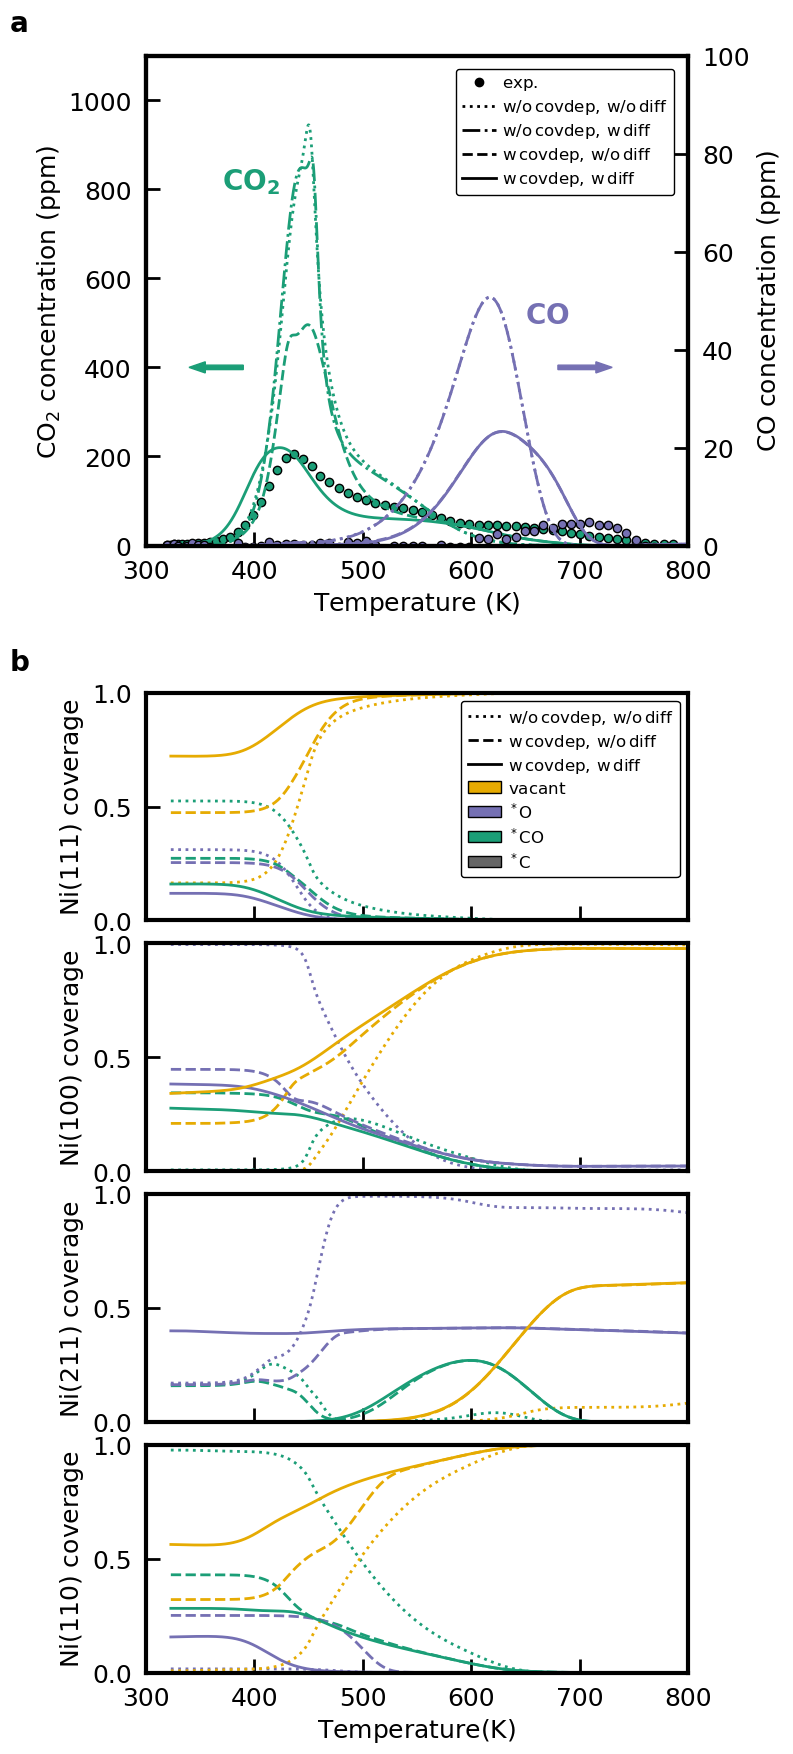

In [10]:
plt.rcParams['figure.figsize']=(7,21)
colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 4)]

#gs=gridspec.GridSpec(nrows=1, ncols=2)
#gs.update(wspace=0.4, hspace=0.3)

fig=plt.figure()
gs=fig.add_gridspec(2,1, height_ratios=[1,2]) #

npoints=20
idx=5410

gs0=gs[0,0].subgridspec(1,1, wspace=0.0,  hspace=0.5)
gs1=gs[1,0].subgridspec(4,1, wspace=0.0, hspace=0.1)

ax0=plt.subplot(gs0[0,0])
ax1=plt.subplot(gs1[0,0])
ax2=plt.subplot(gs1[1,0])
ax3=plt.subplot(gs1[2,0])
ax4=plt.subplot(gs1[3,0])

ax0.set_xlim([300,800])
ax0.set_ylim([0,1100])
ax0.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax0.set_ylabel('$\mathrm{CO_2\ concentration\ (ppm)}$')

ax00 = ax0.twinx()
ax00.set_ylim([0,100])
ax00.set_ylabel('$\mathrm{CO\ concentration\ (ppm)}$')

ax0.plot(exp['T_TPD'][::npoints]+273,exp['CO2'][::npoints]*1e4, linestyle='None', marker='o',markeredgecolor='k',markerfacecolor=colors[0])
ax00.plot(exp['T_TPD'][::npoints]+273,exp['CO'][::npoints]*1e4-np.mean(exp['CO'][:50]*1e4), linestyle='None', marker='o',markeredgecolor='k',markerfacecolor=colors[1])

idx_max=np.argmax(exp['CO2'])
print('exp. CO2',np.round(exp['T_TPD'][idx_max]+273,0))
idx_max=np.argmax(exp['CO'])
print('exp. CO2',np.round(exp['T_TPD'][idx_max]+273,0))

ax0.text(370,800,'$\mathbf{CO_2}$',color=colors[0],fontsize=20)
ax0.text(650,500,'$\mathbf{CO}$',color=colors[1],fontsize=20)

ax0.plot(vanilla['Temp'][idx:],vanilla['CO2'][idx:]*1e6,color=colors[0],alpha=1,linestyle='dotted')
ax00.plot(vanilla['Temp'][idx:],vanilla['CO'][idx:]*1e6,color=colors[1],alpha=1,linestyle='dotted')

idx_max=np.argmax(vanilla['CO2'][idx:])
print('vanilla CO2',np.round(vanilla['Temp'][idx_max+idx],0))
idx_max=np.argmax(vanilla['CO'][idx:])
print('vanilla CO',np.round(vanilla['Temp'][idx_max+idx],0))

ax0.plot(no_cov_diff['Temp'][idx:],no_cov_diff['CO2'][idx:]*1e6,color=colors[0],linestyle='dashdot')
ax00.plot(no_cov_diff['Temp'][idx:],no_cov_diff['CO'][idx:]*1e6,color=colors[1],linestyle='dashdot')

idx_max=np.argmax(no_cov_diff['CO2'][idx:])
print('no_cov_diff CO2',np.round(no_cov_diff['Temp'][idx_max+idx],0))
idx_max=np.argmax(no_cov_diff['CO'][idx:])
print('no_cov_diff CO',np.round(no_cov_diff['Temp'][idx_max+idx],0))

ax0.plot(cov_no_diff['Temp'][idx:],cov_no_diff['CO2'][idx:]*1e6,color=colors[0],linestyle='dashed')
ax00.plot(cov_no_diff['Temp'][idx:],cov_no_diff['CO'][idx:]*1e6,color=colors[1],linestyle='dashed')

idx_max=np.argmax(cov_no_diff['CO2'][idx:])
print('cov_no_diff CO2',np.round(cov_no_diff['Temp'][idx_max+idx],0))
idx_max=np.argmax(cov_no_diff['CO'][idx:])
print('cov_no_diff CO',np.round(cov_no_diff['Temp'][idx_max+idx],0))

ax0.plot(cov_diff['Temp'][idx:],cov_diff['CO2'][idx:]*1e6,color=colors[0],linestyle='solid')
ax00.plot(cov_diff['Temp'][idx:],cov_diff['CO'][idx:]*1e6,color=colors[1],linestyle='solid')

idx_max=np.argmax(cov_diff['CO2'][idx:])
print('cov_diff CO2',np.round(cov_diff['Temp'][idx_max+idx],0))
idx_max=np.argmax(cov_diff['CO'][idx:])
print('cov_diff CO',np.round(cov_diff['Temp'][idx_max+idx],0))

ax0.arrow(390,400,-50,0, width=10, head_width=25, head_length=15, length_includes_head=True,color=colors[0])
ax0.arrow(680,400, 50,0, width=10, head_width=25, head_length=15, length_includes_head=True,color=colors[1])

#dummys
ax0.plot(100, 100, color='k',marker='o', linewidth=2,linestyle='None', label='$\mathrm{exp.}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='dotted', label='$\mathrm{w/o\, covdep, \, w/o\, diff}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='dashdot', label='$\mathrm{w/o\, covdep, \, w\, diff}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='dashed', label='$\mathrm{w\, covdep, \, w/o\, diff}$')
ax0.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{w\, covdep, \, w\, diff}$')

ax0.legend(bbox_to_anchor=(0.99,0.99))

import matplotlib.patches as mpatches
patch_vacant=mpatches.Patch(facecolor=colors[2], edgecolor='k', label='$\mathrm{vacant}$')
patch_O=mpatches.Patch(facecolor=colors[1], edgecolor='k', label='$\mathrm{^*O}$')
patch_CO=mpatches.Patch(facecolor=colors[0], edgecolor='k', label='$\mathrm{^*CO}$')
patch_C=mpatches.Patch(facecolor=colors[3], edgecolor='k', label='$\mathrm{^*C}$')

ax1.set_xlim([300,800])
ax1.set_ylim([0,1])
ax1.set_ylabel('$\mathrm{Ni(111)\ coverage}$')
ax1.plot(vanilla['Temp'][idx:],vanilla['OC(111)'][idx:],color=colors[0],linestyle='dotted')
ax1.plot(vanilla['Temp'][idx:],vanilla['O(111)'][idx:],color=colors[1],linestyle='dotted')
ax1.plot(vanilla['Temp'][idx:],vanilla['site(111)'][idx:],color=colors[2],linestyle='dotted')
ax1.plot(vanilla['Temp'][idx:],vanilla['C(111)'][idx:],color=colors[3],linestyle='dotted')

ax1.plot(cov_no_diff['Temp'][idx:],cov_no_diff['OC(111)'][idx:],color=colors[0],linestyle='dashed')
ax1.plot(cov_no_diff['Temp'][idx:],cov_no_diff['O(111)'][idx:],color=colors[1],linestyle='dashed')
ax1.plot(cov_no_diff['Temp'][idx:],cov_no_diff['site(111)'][idx:],color=colors[2],linestyle='dashed')
ax1.plot(cov_no_diff['Temp'][idx:],cov_no_diff['C(111)'][idx:],color=colors[3],linestyle='dashed')

ax1.plot(cov_diff['Temp'][idx:],cov_diff['OC(111)'][idx:],color=colors[0],linestyle='solid')
ax1.plot(cov_diff['Temp'][idx:],cov_diff['O(111)'][idx:],color=colors[1],linestyle='solid')
ax1.plot(cov_diff['Temp'][idx:],cov_diff['site(111)'][idx:],color=colors[2],linestyle='solid')
ax1.plot(cov_diff['Temp'][idx:],cov_diff['C(111)'][idx:],color=colors[3],linestyle='solid')

ax1.xaxis.set_ticklabels([])
ax1.get_yaxis().set_ticks([0,0.5,1])

#dummys
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='dotted', label='$\mathrm{w/o\, covdep, \, w/o\, diff}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='dashed', label='$\mathrm{w\, covdep, \, w/o\, diff}$')
ax1.plot(100, 100, color='k',marker='None', linewidth=2,linestyle='solid', label='$\mathrm{w\, covdep, \, w\, diff}$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=[handles[0], handles[1], handles[2], patch_vacant, patch_O, patch_CO, patch_C])

ax2.set_xlim([300,800])
ax2.set_ylim([0,1])
ax2.set_ylabel('$\mathrm{Ni(100)\ coverage}$')
ax2.plot(vanilla['Temp'][idx:],vanilla['OC(100)'][idx:],color=colors[0],linestyle='dotted')
ax2.plot(vanilla['Temp'][idx:],vanilla['O(100)'][idx:],color=colors[1],linestyle='dotted')
ax2.plot(vanilla['Temp'][idx:],vanilla['site(100)'][idx:],color=colors[2],linestyle='dotted')
ax3.plot(vanilla['Temp'][idx:],vanilla['C(100)'][idx:],color=colors[3],linestyle='dotted')

ax2.plot(cov_no_diff['Temp'][idx:],cov_no_diff['OC(100)'][idx:],color=colors[0],linestyle='dashed')
ax2.plot(cov_no_diff['Temp'][idx:],cov_no_diff['O(100)'][idx:],color=colors[1],linestyle='dashed')
ax2.plot(cov_no_diff['Temp'][idx:],cov_no_diff['site(100)'][idx:],color=colors[2],linestyle='dashed')
ax2.plot(cov_no_diff['Temp'][idx:],cov_no_diff['C(100)'][idx:],color=colors[3],linestyle='dashed')

ax2.plot(cov_diff['Temp'][idx:],cov_diff['OC(100)'][idx:],color=colors[0],linestyle='solid')
ax2.plot(cov_diff['Temp'][idx:],cov_diff['O(100)'][idx:],color=colors[1],linestyle='solid')
ax2.plot(cov_diff['Temp'][idx:],cov_diff['site(100)'][idx:],color=colors[2],linestyle='solid')
ax2.plot(cov_diff['Temp'][idx:],cov_diff['C(100)'][idx:],color=colors[3],linestyle='solid')

ax2.xaxis.set_ticklabels([])
ax2.get_yaxis().set_ticks([0,0.5,1])

ax3.set_xlim([300,800])
ax3.set_ylim([0,1])
ax3.set_ylabel('$\mathrm{Ni(211)\ coverage}$')
ax3.plot(vanilla['Temp'][idx:],vanilla['OC(211)'][idx:],color=colors[0],linestyle='dotted')
ax3.plot(vanilla['Temp'][idx:],vanilla['O(211)'][idx:],color=colors[1],linestyle='dotted')
ax3.plot(vanilla['Temp'][idx:],vanilla['site(211)'][idx:],color=colors[2],linestyle='dotted')
ax3.plot(vanilla['Temp'][idx:],vanilla['C(211)'][idx:],color=colors[3],linestyle='dotted')

ax3.plot(cov_no_diff['Temp'][idx:],cov_no_diff['OC(211)'][idx:],color=colors[0],linestyle='dashed')
ax3.plot(cov_no_diff['Temp'][idx:],cov_no_diff['O(211)'][idx:],color=colors[1],linestyle='dashed')
ax3.plot(cov_no_diff['Temp'][idx:],cov_no_diff['site(211)'][idx:],color=colors[2],linestyle='dashed')
ax3.plot(cov_no_diff['Temp'][idx:],cov_no_diff['C(211)'][idx:],color=colors[3],linestyle='dashed')

ax3.plot(cov_diff['Temp'][idx:],cov_diff['OC(211)'][idx:],color=colors[0],linestyle='solid')
ax3.plot(cov_diff['Temp'][idx:],cov_diff['O(211)'][idx:],color=colors[1],linestyle='solid')
ax3.plot(cov_diff['Temp'][idx:],cov_diff['site(211)'][idx:],color=colors[2],linestyle='solid')
ax3.plot(cov_diff['Temp'][idx:],cov_diff['C(211)'][idx:],color=colors[3],linestyle='solid')

ax3.xaxis.set_ticklabels([])
ax3.get_yaxis().set_ticks([0,0.5,1])

ax4.set_xlim([300,800])
ax4.set_ylim([0,1])
ax4.get_yaxis().set_ticks([0,0.5,1])
ax4.set_xlabel('$\mathrm{Temperature (K)}$')
ax4.set_ylabel('$\mathrm{Ni(110)\ coverage}$')
ax4.plot(vanilla['Temp'][idx:],vanilla['OC(110)'][idx:],color=colors[0],linestyle='dotted')
ax4.plot(vanilla['Temp'][idx:],vanilla['O(110)'][idx:],color=colors[1],linestyle='dotted')
ax4.plot(vanilla['Temp'][idx:],vanilla['site(110)'][idx:],color=colors[2],linestyle='dotted')
ax4.plot(vanilla['Temp'][idx:],vanilla['C(110)'][idx:],color=colors[3],linestyle='dotted')

ax4.plot(cov_no_diff['Temp'][idx:],cov_no_diff['OC(110)'][idx:],color=colors[0],linestyle='dashed')
ax4.plot(cov_no_diff['Temp'][idx:],cov_no_diff['O(110)'][idx:],color=colors[1],linestyle='dashed')
ax4.plot(cov_no_diff['Temp'][idx:],cov_no_diff['site(110)'][idx:],color=colors[2],linestyle='dashed')
ax4.plot(cov_no_diff['Temp'][idx:],cov_no_diff['C(110)'][idx:],color=colors[3],linestyle='dashed')

ax4.plot(cov_diff['Temp'][idx:],cov_diff['OC(110)'][idx:],color=colors[0],linestyle='solid')
ax4.plot(cov_diff['Temp'][idx:],cov_diff['O(110)'][idx:],color=colors[1],linestyle='solid')
ax4.plot(cov_diff['Temp'][idx:],cov_diff['site(110)'][idx:],color=colors[2],linestyle='solid')
ax4.plot(cov_diff['Temp'][idx:],cov_diff['C(110)'][idx:],color=colors[3],linestyle='solid')

import string
ax0.text(-0.25, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.25, 1.1, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('tpd_profiles.pdf',bbox_inches='tight',transparent=False)
plt.show()

In [5]:
import cantera as ct


catarea = 10.4 # m2/g 
#facet_fraction = [0.6923, 0.211, 0.0439, 0.0528, 0.0, 0.0, 0.0, 0.0] # [111, 100, 211, 110, edges...
mcat=0.040 # catalyst mass in g
T=383 # Initial temperature in K
yaml_file= '/users/bkreitz1/scratch/multifacet/TPD/multifacet.yaml'
# import the gas model and set the initial conditions
gas = ct.Solution(yaml_file, 'gas')
gas.TPX = T, 1*ct.one_atm, 'Ar:1, CO2:0.0, CO:0'

            
# Normalize
facet_fraction=[0.6923, 0.211, 0.0439, 0.0528]
normalized_facet_fraction = facet_fraction/np.sum(facet_fraction)

i_co2=gas.species_index('CO2')
i_co=gas.species_index('CO')

const_CO2 = catarea*mcat*gas.molecular_weights[i_co2]   # unit: m2*kg/kmol 
const_CO = catarea*mcat*gas.molecular_weights[i_co]   # unit: m2*kg/kmol 

# CO2
# No diffusion

def individual_rop(case,molecule):
    if molecule == 'CO2':
        column = 'co2'
        const=const_CO2
    elif molecule == 'CO':
        column = 'co'
        const=const_CO

    facets=['111','100','211','110']
    rop=np.zeros((len(vanilla['Temp']),len(facets)))
    for i,k in enumerate(facets):
        rop[:,i]=case[column + '_rop_'+ str(k)]*facet_fraction[i]*const
    rop_sum = np.sum(rop, axis=1)

    conc=np.zeros((len(vanilla['Temp']),len(facets)))
    for i in range(len(case['Temp'])):
        for k in range(len(facets)):
            if(rop_sum[i] == 0):
                conc[i,k] = 0
            else:            
                conc[i,k] = rop[i,k]/rop_sum[i]*case[molecule][i]
    return conc
    
base_CO2=individual_rop(vanilla,'CO2')
full_CO2=individual_rop(cov_diff,'CO2')


base_CO=individual_rop(vanilla,'CO')
full_CO=individual_rop(cov_diff,'CO')

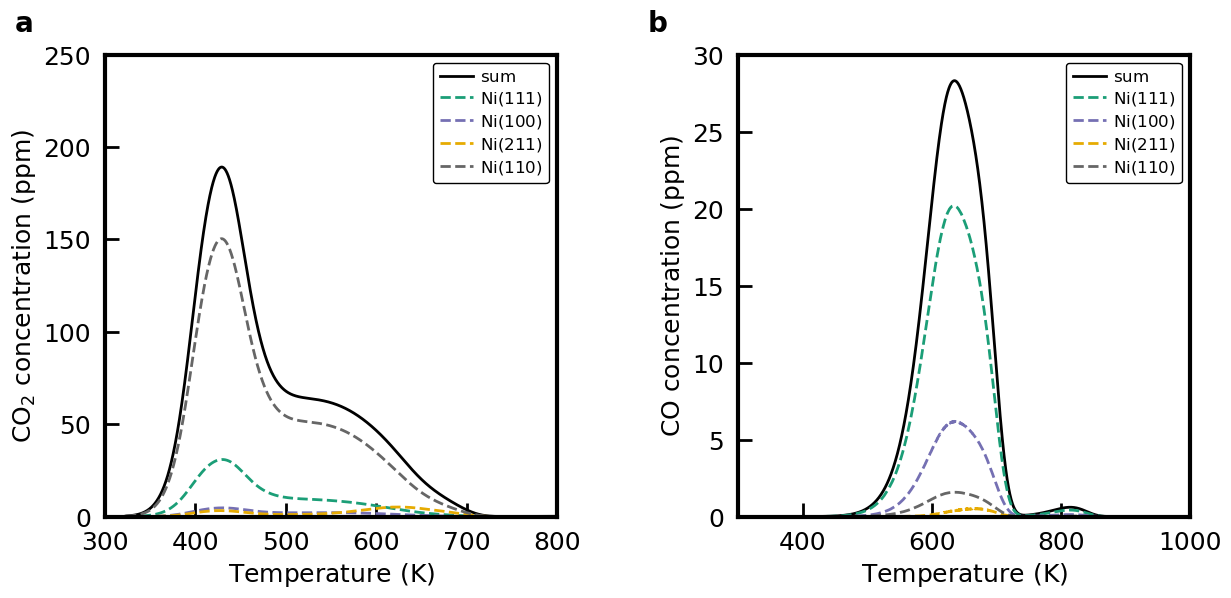

In [7]:
plt.rcParams['figure.figsize']=(14,6)
idx=5410
gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.3)

T=vanilla['Temp'][idx:]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.plot(T,cov_diff['CO2'][idx:]*1e6,label='$\mathrm{sum}$',color='k')

ax0.plot(T,full_CO2[idx:,0]*1e6,linestyle='dashed',color=colors[0],label='$\mathrm{Ni(111)}$')
ax0.plot(T,full_CO2[idx:,1]*1e6,linestyle='dashed',color=colors[1],label='$\mathrm{Ni(100)}$')
ax0.plot(T,full_CO2[idx:,2]*1e6,linestyle='dashed',color=colors[2],label='$\mathrm{Ni(211)}$')
ax0.plot(T,full_CO2[idx:,3]*1e6,linestyle='dashed',color=colors[3],label='$\mathrm{Ni(110)}$')

ax0.set_xlim([300,800])
ax0.set_ylim([0,250])
ax0.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax0.set_ylabel('$\mathrm{CO_2\ concentration\ (ppm)}$')
ax0.legend()


ax1.plot(T,cov_diff['CO'][idx:]*1e6,label='$\mathrm{sum}$',color='k')

ax1.plot(T,full_CO[idx:,0]*1e6,linestyle='dashed',color=colors[0],label='$\mathrm{Ni(111)}$')
ax1.plot(T,full_CO[idx:,1]*1e6,linestyle='dashed',color=colors[1],label='$\mathrm{Ni(100)}$')
ax1.plot(T,full_CO[idx:,2]*1e6,linestyle='dashed',color=colors[2],label='$\mathrm{Ni(211)}$')
ax1.plot(T,full_CO[idx:,3]*1e6,linestyle='dashed',color=colors[3],label='$\mathrm{Ni(110)}$')

ax1.set_xlim([300,1000])
ax1.set_ylim([0,30])
ax1.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax1.set_ylabel('$\mathrm{CO\ concentration\ (ppm)}$')
ax1.legend()

import string
ax0.text(-0.2, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.2, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('rop_base.pdf',bbox_inches='tight',transparent=False)

In [8]:
best_match=9887

best_cov_diff=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/UQ/mechanisms/File_'+ str(best_match) +'/tpd_cov_diff.txt', sep = ",", header=0)

facet_fraction=[0.6558,0.2637,0.0694,0.0111]

def individual_rop(case,molecule):
    if molecule == 'CO2':
        column = 'co2'
        const=const_CO2
    elif molecule == 'CO':
        column = 'co'
        const=const_CO

    facets=['111','100','211','110']
    rop=np.zeros((len(vanilla['Temp']),len(facets)))
    for i,k in enumerate(facets):
        rop[:,i]=case[column + '_rop_'+ str(k)]*facet_fraction[i]*const
    rop_sum = np.sum(rop, axis=1)

    conc=np.zeros((len(vanilla['Temp']),len(facets)))
    for i in range(len(case['Temp'])):
        for k in range(len(facets)):
            if(rop_sum[i] <= 0):
                conc[i,k] = 0
            else:            
                conc[i,k] = rop[i,k]/rop_sum[i]*case[molecule][i]
    return conc

best_full_CO=individual_rop(best_cov_diff,'CO')
best_full_CO2=individual_rop(best_cov_diff,'CO2')

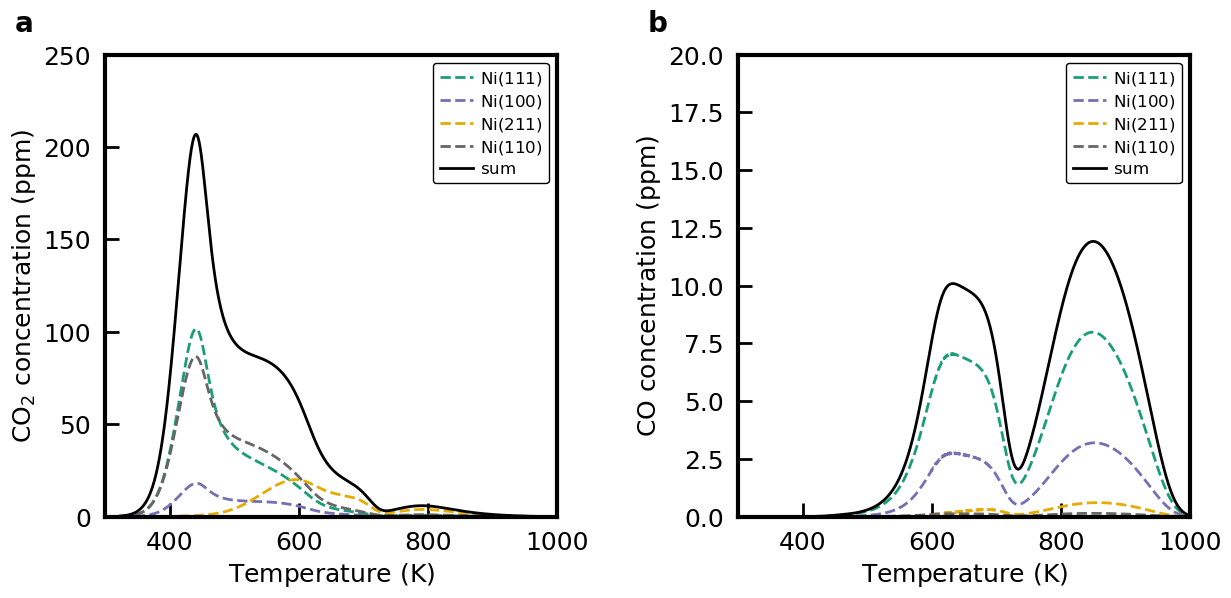

In [9]:
gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.3)

T=vanilla['Temp'][idx:]



ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.plot(T,best_full_CO2[idx:,0]*1e6,color=colors[0],linestyle='dashed',label='$\mathrm{Ni(111)}$')
ax0.plot(T,best_full_CO2[idx:,1]*1e6,color=colors[1],linestyle='dashed',label='$\mathrm{Ni(100)}$')
ax0.plot(T,best_full_CO2[idx:,2]*1e6,color=colors[2],linestyle='dashed',label='$\mathrm{Ni(211)}$')
ax0.plot(T,best_full_CO2[idx:,3]*1e6,color=colors[3],linestyle='dashed',label='$\mathrm{Ni(110)}$')

ax0.plot(T,best_cov_diff['CO2'][idx:]*1e6,color='k',label='$\mathrm{sum}$')
ax0.set_xlim([300,1000])
ax0.set_ylim([0,250])
ax0.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax0.set_ylabel('$\mathrm{CO_2\ concentration\ (ppm)}$')
ax0.legend()

ax1.plot(T,best_full_CO[idx:,0]*1e6,color=colors[0],linestyle='dashed',label='$\mathrm{Ni(111)}$')
ax1.plot(T,best_full_CO[idx:,1]*1e6,color=colors[1],linestyle='dashed',label='$\mathrm{Ni(100)}$')
ax1.plot(T,best_full_CO[idx:,2]*1e6,color=colors[2],linestyle='dashed',label='$\mathrm{Ni(211)}$')
ax1.plot(T,best_full_CO[idx:,3]*1e6,color=colors[3],linestyle='dashed',label='$\mathrm{Ni(110)}$')

ax1.plot(T,best_cov_diff['CO'][idx:]*1e6,color='k',label='$\mathrm{sum}$')
ax1.set_xlim([300,1000])
ax1.set_ylim([0,20])
ax1.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax1.set_ylabel('$\mathrm{CO\ concentration\ (ppm)}$')
ax1.legend()

import string
ax0.text(-0.2, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.2, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('rop_best_match.pdf',bbox_inches='tight')

In [10]:
best_match=16996

best_nodiff=pd.read_csv('/users/bkreitz1/scratch/multifacet/TPD/UQ/mechanisms/File_'+ str(best_match) +'/tpd_cov_nodiff.txt', sep = ",", header=0)

#facet_fraction=[0.5898,0.3036,0.0553,0.0513]
facet_fraction=[0.4025,0.4408,0.0812,0.0754]
#[0.4025 0.4408 0.0812 0.0754]
def individual_rop(case,molecule):
    if molecule == 'CO2':
        column = 'co2'
        const=const_CO2
    elif molecule == 'CO':
        column = 'co'
        const=const_CO

    facets=['111','100','211','110']
    rop=np.zeros((len(vanilla['Temp']),len(facets)))
    for i,k in enumerate(facets):
        rop[:,i]=case[column + '_rop_'+ str(k)]*facet_fraction[i]*const
    rop_sum = np.sum(rop, axis=1)

    conc=np.zeros((len(vanilla['Temp']),len(facets)))
    for i in range(len(case['Temp'])):
        for k in range(len(facets)):
            if(rop_sum[i] <= 1e-13):
                conc[i,k] = 0
            else:            
                conc[i,k] = rop[i,k]/rop_sum[i]*case[molecule][i]
    return conc#, rop_sum

best_full_CO=individual_rop(best_nodiff,'CO')
best_full_CO2=individual_rop(best_nodiff,'CO2')

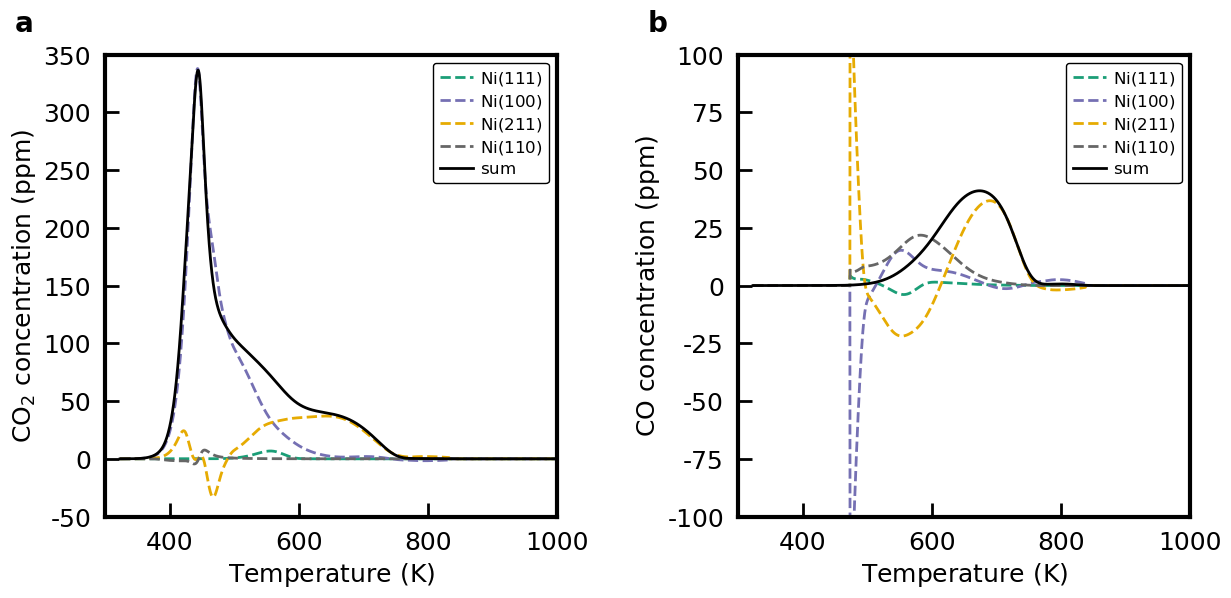

In [11]:
gs=gridspec.GridSpec(nrows=1, ncols=2)
gs.update(wspace=0.4, hspace=0.3)

T=vanilla['Temp'][idx:]

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])

ax0.plot(T,best_full_CO2[idx:,0]*1e6,color=colors[0],linestyle='dashed',label='$\mathrm{Ni(111)}$')
ax0.plot(T,best_full_CO2[idx:,1]*1e6,color=colors[1],linestyle='dashed',label='$\mathrm{Ni(100)}$')
ax0.plot(T,best_full_CO2[idx:,2]*1e6,color=colors[2],linestyle='dashed',label='$\mathrm{Ni(211)}$')
ax0.plot(T,best_full_CO2[idx:,3]*1e6,color=colors[3],linestyle='dashed',label='$\mathrm{Ni(110)}$')

ax0.plot(T,best_nodiff['CO2'][idx:]*1e6,color='k',label='$\mathrm{sum}$')
ax0.set_xlim([300,1000])
ax0.set_ylim([-50,350])
ax0.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax0.set_ylabel('$\mathrm{CO_2\ concentration\ (ppm)}$')
ax0.legend()

ax1.plot(T,best_full_CO[idx:,0]*1e6,color=colors[0],linestyle='dashed',label='$\mathrm{Ni(111)}$')
ax1.plot(T,best_full_CO[idx:,1]*1e6,color=colors[1],linestyle='dashed',label='$\mathrm{Ni(100)}$')
ax1.plot(T,best_full_CO[idx:,2]*1e6,color=colors[2],linestyle='dashed',label='$\mathrm{Ni(211)}$')
ax1.plot(T,best_full_CO[idx:,3]*1e6,color=colors[3],linestyle='dashed',label='$\mathrm{Ni(110)}$')

ax1.plot(T,best_nodiff['CO'][idx:]*1e6,color='k',label='$\mathrm{sum}$')
ax1.set_xlim([300,1000])
ax1.set_ylim([-100,100])
ax1.set_xlabel('$\mathrm{Temperature\ (K)}$')
ax1.set_ylabel('$\mathrm{CO\ concentration\ (ppm)}$')
ax1.legend()

import string
ax0.text(-0.2, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.2, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')

plt.savefig('rop_best_match_nodiff.pdf',bbox_inches='tight')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.00859259e-45,  5.11700027e-41, -9.38959386e-41])